In [133]:
import json
import pandas as pd
from pathlib import Path
import re
import lxml
from bs4 import BeautifulSoup
from langdetect import detect
import emoji
import seaborn as sns
import matplotlib.pyplot as plt
from re import RegexFlag

In [105]:
raw_data_paths = list(Path("./raw_data/").glob("*.json"))

In [106]:
df = pd.concat([pd.read_json(path, orient="records") for path in raw_data_paths])

In [107]:
df = df.drop(["id"], axis=1)

In [108]:
df

,text
0,"🔊 Ищем к себе в Лабораторию 5 NLP DS. \nПо 1 DS на каждое из направлений: чат-бот, voice-бот, классификация входящих обращений, речевая аналитика, генеративные модели. \nПредпочтение отдадим наиболее сильным кандидатам. \n\nПозиции: Junior/Middle/Senior Data Scientist. \nКуда? Альфа-банк, Лаборатория машинного обучения, NLP-команда\nФормат работы: Удаленно в РФ или Москва, м. Технопарк. Возможна полная удаленка с оформлением на территории РФ.\nВилка гросс: 120-200k/200-300k/300-400k + ежеквартальный бонус ~ 15% (от дохода за квартал).\n\nПро команду:\nВсе NLP-задачи компании решаются силами этой команды. Сейчас в этой части команды 6 NLP DS. \nПодробнее про результаты работы команды: про чат-бота, про работу с отзывами, про чеки, про классификацию обращений на 1000+ классов. \n\nЧто предстоит делать?\nВ Лабораториии задачи DSa не ограничиваются тюнингом параметров и выбором архитектур нейросетей. На этих позициях нужно будет плотно общаться с продуктовой командой и определять компоненты ml-продуктов, ставить задачи командам асессоров, дата инженеров, млопсов и мониторинга. Подробнее про роль дата сайентиста в нашей команде.\n\nВ направлениях чат-бота, voice-бота и классификации входящих обращений модели уже работают в проде. \nПредстоит заниматься следующими задачами:\n- Разрабатывать аналогичные модели для других сегментов клиентов. Например, модели voice-бота разработаны только для ФЛ, предстоит разработать для ЮЛ.\n- Обновлять модели для ответов на вопросы клиентов про новые продукты и процессы\n- Улучшать качество моделей за счет применения моделей на новых этапах принятия решения и новых данных.\n\nВ направлении речевой аналитики с нуля разрабатывать следующие модели: \n- Оценка качества работы операторов и формирование рекомендации для обучения.\n- Формирование рекомендаций в онлайне для повышения качества обслуживания. \n\nВ направлении генеративных моделей будем адаптировать LLM под задачи обслуживания клиентов. \n\nОбязательные Требования:\n• Опыт работы с нейронными сетями (учебные проекты/соревнования для Junior)/ опыт внедрения моделей в прод для Middle/Senior;\n• Технологический стек: python + pytorch:, LightGBM/XGBoost/CatBoost, sklearn, pandas, numpy + sql + git.\n• Практический подход к решению NLP-задач методами ML и DL.\n• Понимание основных принципов и алгоритмов классического ML.\n• Умение выбирать метрику под бизнес-задачу\n\nОтветы на 10 важных вопросов.\n\nПрисылать резюме на esmirnov6@alfabank.ru с темой письма: ""NLP DS в Лабораторию""."
1,"#вакансия\n\nВсем привет!)\nИщем Data Analyst на крутой проект Сбера)\n\nПозиция: Junior+/Middle Data Analyst (с функцией DS) \nКуда: СБЕР, Управление моделирования и исследования данных \nФормат работы: Офис, Москва, м.Кутузовская \nВилка, гросс: Middle 200-270к \nГодовой бонус: 2-4 оклада \n \nНаша команда помогает бизнесу улучшить процессы за счет AI моделей. \nСейчас ищем в команду специалиста, который поможет построить качественные модели и витрины на основе геоданных, а также сделать взаимодействие с такими данными удобными для потребителей. \n \nЧто нужно делать? \n- разрабатывать, поддерживать и улучшать ML модели на основе большого объема геоданных (POS, ATM транзакции и т.д.) \n- анализировать эффективность новых источников данных \n- готовить витрины и модели к выводу в ПРОМ \n- проводить A/B тесты и оценивать эффект от изменений \n- экспериментировать с SOTA подходами \n \nНаши ожидания: \n- знание SQL (у нас Greenplum) \n- опыт работы c пакетами для анализа данных на python (numpy, pandas, scikit-learn, xgboost, lightgbm, catboost, etc) \n- знание основ классического ML (используем свой automl) \n- аналитический склад ума \n \nБудем плюсом: \n- опыт работы с экосистемой hadoop (spark, hive, hdfs) \n- опыт работы с git, bash \n \nУсловия: \nИпотека выгоднее для каждого сотрудника и льготные условия кредитования \nБесплатная подписка СберПрайм+; \nСкидки на продукты компаний-партнеров: Okko, Сбер Маркет, Delivery Club, Самокат, Ситимобил, Сбер Еа

In [178]:
import re

def preprocess_text(text):
    # remove links
    text = re.sub(r'http\S+', '', text)
    
    # remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    
    # remove hashtags (including the word connected with it)
    text = re.sub(r'#\S+', '', text)
    
    # remove emojis
    text = emoji.replace_emoji(text)
    
    # replace all whitespace characters (including newlines and tabs) with a space
    text = re.sub(r'\s+', ' ', text)
    
    # Delete text with pattern "Публикатор: {any text} @devops_jobs"
    text = re.sub(r'Публикатор: .*?@devops_jobs', '', text)
    
    # Remove whitespace between digits
    text = re.sub(r'(\d)\s+(\d)', r'\1\2', text)

    # Replace any brackets with whitespace
    text = re.sub(r'[()\[\]{}■●◆◦_*"▬•:\\;]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove text without Russian language
    russian_regex = re.compile(r'[а-яА-ЯёЁ]')
    if re.search(r'(художник|дизайнер|менеджер|школа|продавец|трек|маркетолог|куратор|редактор|конкурс|подборка|аниматор)', text, flags=re.IGNORECASE):
        text = ''
    
    text = text if russian_regex.search(text) else ""
       
    return text


In [179]:
df['text'] = df['text'].apply(str).apply(preprocess_text)

In [180]:
print("Количество столбцов с отсутствием описанием вакансий ", df.isna().any(axis=1).sum())
df = df.dropna()
print("Количество данных после удаления строк без описания:\n", df.count())
df = df.drop_duplicates()

Количество столбцов с отсутствием описанием вакансий  0
Количество данных после удаления строк без описания:
 text    18921
dtype: int64


In [181]:
df['text length']=df['text'].apply(lambda x:len(x))   # calculating length of description for each row

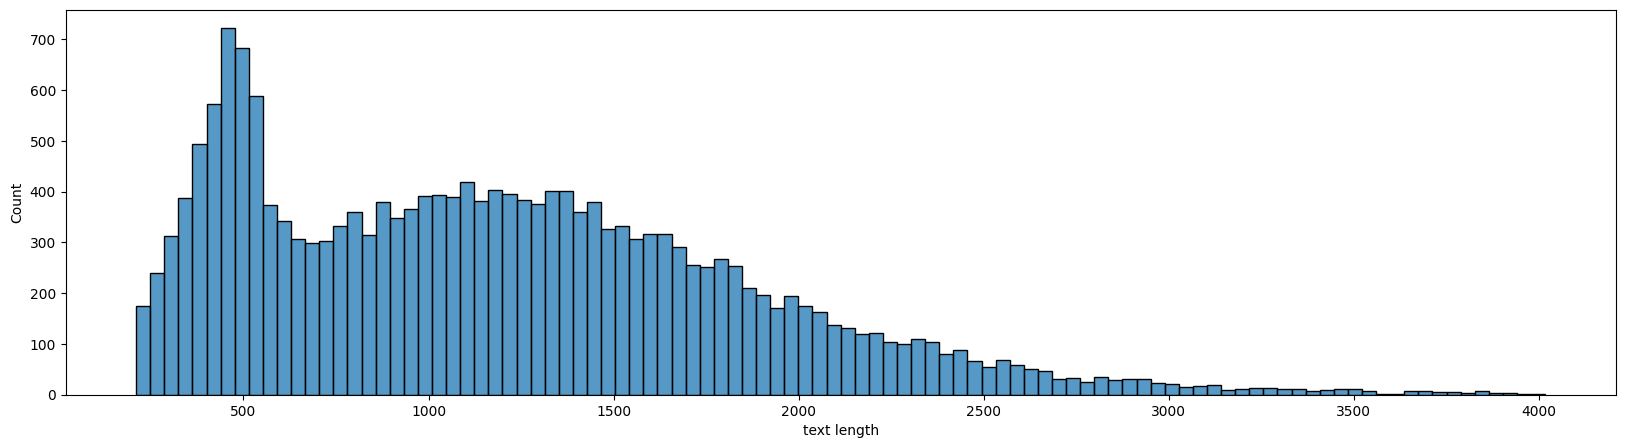

In [182]:
plt.figure(figsize=(20,5))
sns.histplot(data=df, x="text length",bins=100)
plt.show()

In [183]:
pd.set_option('display.max_colwidth', None)
df[df['text length'] < 210].sort_values(by=['text length'])

,text,text length


In [184]:
df = df.drop(df[df['text length'] < 210].index)


In [185]:
df = df.reset_index(drop=True)

In [186]:
df = df.drop(["text length"], axis=1)

In [189]:
df.to_csv(Path("data.csv"), sep=",")